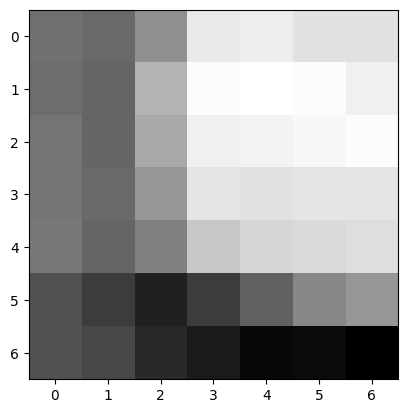

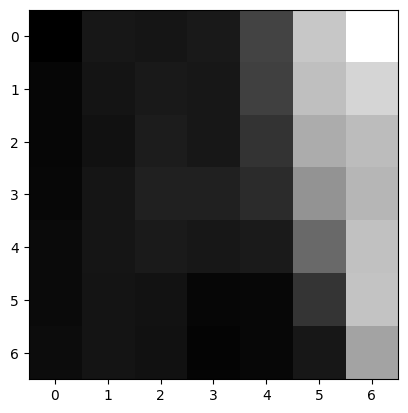

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.gray()


def load(name, show=False):
    img = cv2.imread(name)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    if show:
        plt.imshow(gray)
        plt.show()
    return img_rgb, gray


img_left, gray_left = load("nose_left.png", True)
img_right, gray_right = load("nose_right.png", True)

## Intermediate step 1:

In [3]:
def sum_absolute_diff(img1, img2):
    return np.absolute(img1.astype(np.int64) - img2.astype(np.int64)).sum()


print(f"sum_absolute_diff for left, right is {sum_absolute_diff(img_left, img_right)}")

sum_absolute_diff for left, right is 22971


## Intermediate step 2:

The second image node2.png seems closer to node_left.png than the others

| image | sum_absolute_diff(img_left, img) |
|-------|----------------------------------|
| nose1 | 4083                             |
| nose2 | 357                              |
| nose3 | 4470                             |

In [4]:
for name in ["nose1.png", "nose2.png", "nose3.png"]:
    img, gray = load(name, False)
    print(f"sum_absolute_diff for left, {name} is {sum_absolute_diff(img_left, img)}")

sum_absolute_diff for left, nose1.png is 4083
sum_absolute_diff for left, nose2.png is 357
sum_absolute_diff for left, nose3.png is 4470


## Intermediate step 3:

In [5]:
def find_max_corr(img, span, corr=sum_absolute_diff):
    assert img.shape[0] == span.shape[0]

    candidate = (0, 1_000_000)

    for i in range(0, span.shape[1] - img.shape[1] + 1):
        span_slice = span[:, i:i + img.shape[1]]
        s = corr(img, span_slice)
        if s < candidate[1]:
            candidate = i, s

    return candidate

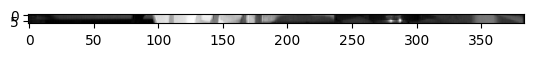

(7, 384)


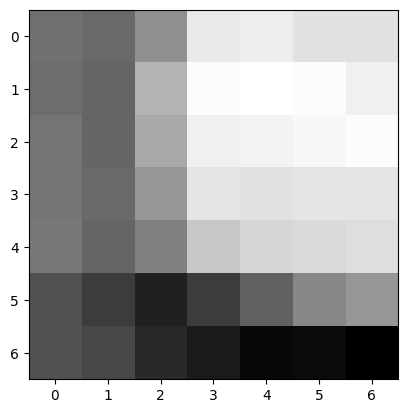

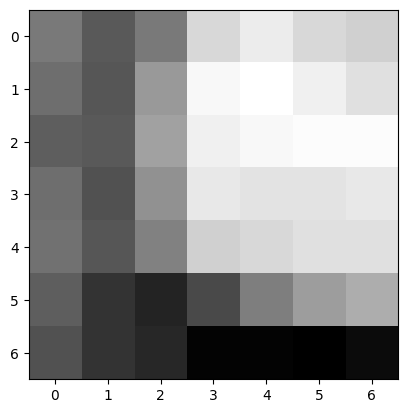

In [6]:
img_span, gray_span = load("nose_span.png", True)
print(gray_span.shape)

idx, s = find_max_corr(gray_left, gray_span)

plt.imshow(gray_left)
plt.show()
plt.imshow(gray_span[:, idx: idx + gray_left.shape[1]])
plt.show()

## Full template matching implementation (Challenge):

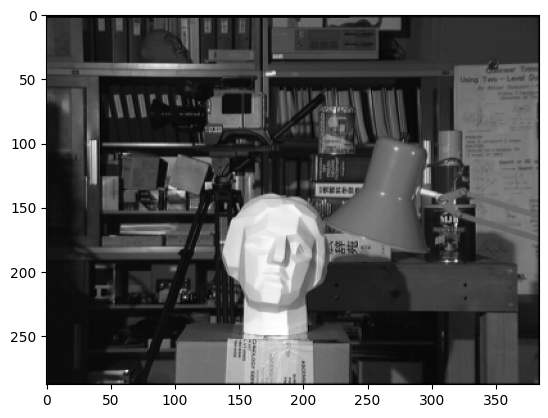

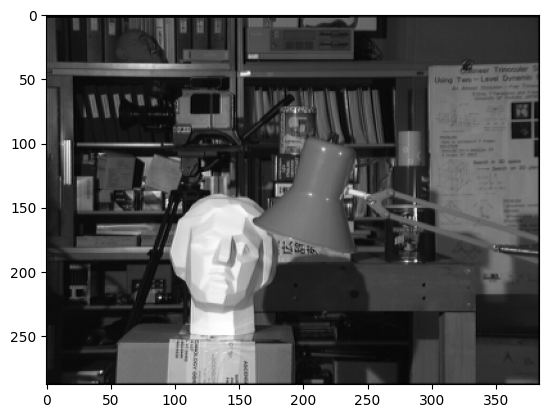

In [7]:
img_left, gray_left = load("tsukuba_left.png", True)
img_right, gray_right = load("tsukuba_right.png", True)

In [8]:
import math

size = 7
result = np.zeros((math.ceil((gray_left.shape[0] - size) / 7), math.ceil((gray_left.shape[1] - size) / 7), 2),
                  dtype=np.int32)

for row in range(0, gray_left.shape[0] - size, 7):
    span = gray_right[row:row + size, :]
    for col in range(0, gray_left.shape[1] - size, 7):
        r = find_max_corr(gray_left[row:row + size, col:col + size], span)
        result[row // 7, col // 7, :] = r[0] - col, r[1]

<Figure size 2000x1500 with 0 Axes>

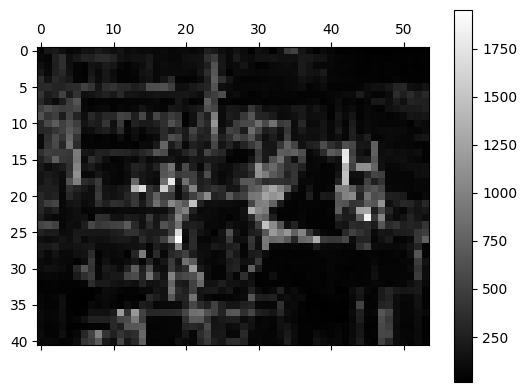

<Figure size 2000x1500 with 0 Axes>

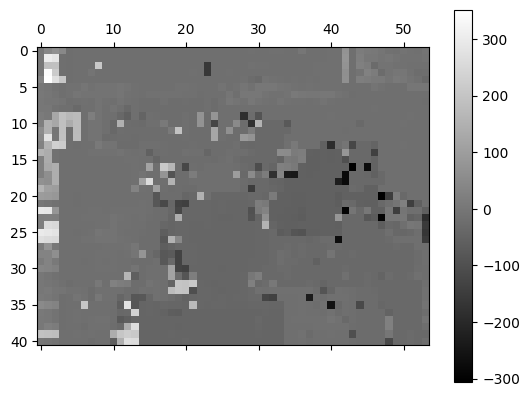

In [16]:
plt.figure(figsize=(20, 15))
plt.matshow(result[:, :, 1])
plt.colorbar()
plt.show()

plt.figure(figsize=(20, 15))
plt.matshow(result[:, :, 0])
plt.colorbar()
plt.show()

The image seems to be moved to the left by around 40 pixels, the following displays the pixels detected as moved to the right by more than 40 pixels

<Figure size 2000x1500 with 0 Axes>

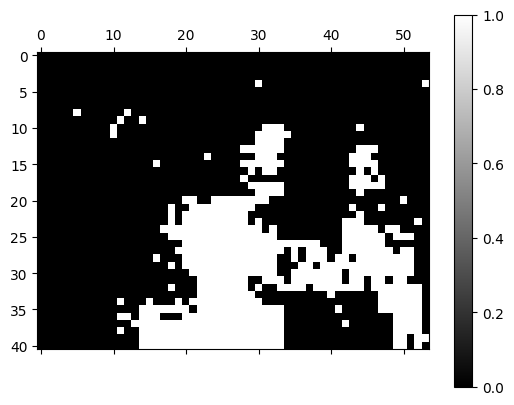

In [22]:
plt.figure(figsize=(20, 15))
plt.matshow(np.logical_and(result[:, :, 0] < -30, result[:, :, 0] > -50))
plt.colorbar()  
plt.show()